In [64]:
# 결측치 : 다양한 이유로 불완전한 데이터 - 누락  None NaN
import pandas as pd
import numpy as np
# [1,2,3 ] + [1,2,3 ]
# [1,2,3]*5
# np.array( [1,2,3 ]) + np.array( [1,2,3 ])
# np.array( [1,2,3 ])*3
df = pd.DataFrame({
    'A' : [1,2,np.nan,4],
    'B' : [5,np.nan,np.nan,8],
    'C' : [9,10,11,12],
})
print('결측치 확인(isna)')
print(df.isna())
print('열별 결측치 개수 확인')
print(df.isna().sum())
print('info')
df.info()

결측치 확인(isna)
       A      B      C
0  False  False  False
1  False   True  False
2   True   True  False
3  False  False  False
열별 결측치 개수 확인
A    1
B    2
C    0
dtype: int64
info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       3 non-null      float64
 1   B       2 non-null      float64
 2   C       4 non-null      int64  
dtypes: float64(2), int64(1)
memory usage: 228.0 bytes


In [65]:
# 결측치 제거
# dropna() 결측치가 포함된 행 또는 열을 제거 axis = 0 기본값/ how='any'  행을제거   axis=1 열을 제거
# how = 'all' 모든 값이 결측치일때 삭제  thresh  : 지정한 개수이상의 비결측치값이 있는 행 , 열을 유지

df.dropna()
df.dropna(axis=1)
df.dropna(how='all')
df.dropna(thresh=2)   # 정상데이터가 2개이상인 행만 유지

,A,B,C
0,1.0,5.0,9
1,2.0,NaN,10
3,4.0,8.0,12


In [66]:
# 결측치 대처
# fillna() : 특정값으로 채움
df.fillna(0)
print(f'각 컬럼의 평균값 \n{df.mean()}')
df.fillna(df.mean())  #df.max() df.min()
# 수치데이터가 아닌 object형은  df.mode() 최빈값
df.fillna(method='ffill') # bfill

각 컬럼의 평균값 
A     2.333333
B     6.500000
C    10.500000
dtype: float64


C:\Users\playdata2\AppData\Local\Temp\ipykernel_10360\2379648566.py:7: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill') # bfill


,A,B,C
0,1.0,5.0,9
1,2.0,5.0,10
2,2.0,5.0,11
3,4.0,8.0,12


In [67]:
df = pd.DataFrame({
    'A' : [1,np.nan,3,np.nan,np.nan,6]
})
print(df)
print(df['A'].ffill())
print(df['A'].bfill())

     A
0  1.0
1  NaN
2  3.0
3  NaN
4  NaN
5  6.0
0    1.0
1    1.0
2    3.0
3    3.0
4    3.0
5    6.0
Name: A, dtype: float64
0    1.0
1    3.0
2    3.0
3    6.0
4    6.0
5    6.0
Name: A, dtype: float64


In [68]:
# 보간법 interpolation  결측치 주변값들을 기반으로 한 선형적인 값으로 채움 - 주로 x축이 시계열 데이터일때 추세를 반영
# 머신러닝 기반 : knn, randomforest  등등...svn..

In [69]:
df = pd.DataFrame({
    'A' : [1,2,np.nan,4,np.nan,7]
})
df['A'].interpolate()
# df['A'].fillna(df['A'].mean())

0    1.0
1    2.0
2    3.0
3    4.0
4    5.5
5    7.0
Name: A, dtype: float64

In [79]:
import matplotlib.pyplot as plt

# matplotlib 한글 폰트 오류 문제 해결
from matplotlib import font_manager, rc
# font_path = "./data/malgun.ttf"   #폰트파일의 위치
font_path = 'C:/Windows/Fonts/gulim.ttc'
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

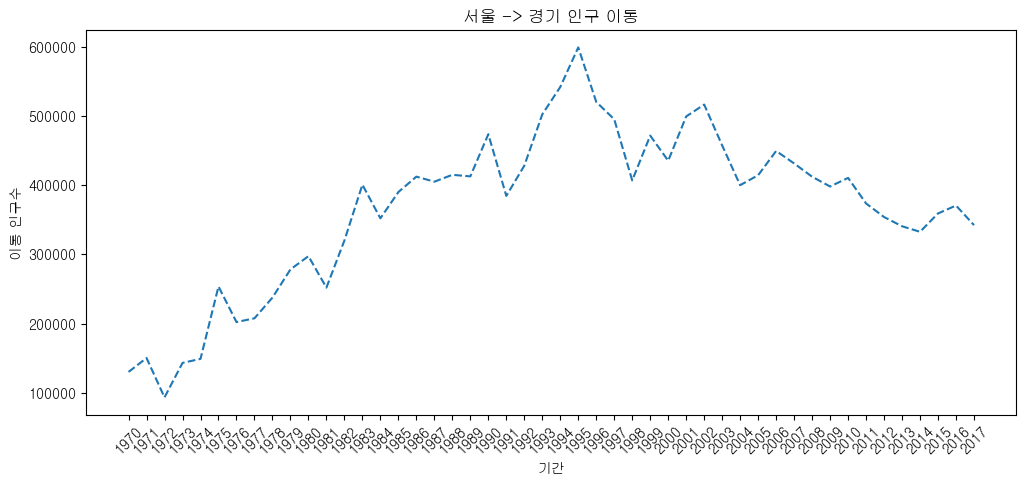

In [80]:
# 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt

# Excel 데이터를 데이터프레임 변환 
df = pd.read_excel('./data/시도별_전출입_인구수.xlsx')

# 누락값(NaN)을 앞 데이터로 채움 (엑셀 양식 병합 부분)
df = df.ffill()

# 서울에서 다른 지역으로 이동한 데이터만 추출하여 정리
mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시') 
df_seoul = df[mask]
df_seoul = df_seoul.drop(['전출지별'], axis=1)
df_seoul = df_seoul.rename({'전입지별':'전입지'}, axis=1)
df_seoul = df_seoul.set_index('전입지')

# 서울에서 경기도로 이동한 인구 데이터 값만 선택 
sr_one = df_seoul.loc['경기도']

plt.figure(figsize=(12,5))
# x, y축 데이터를 plot 함수에 입력
plt.plot(sr_one.index, sr_one.values, linestyle="--")

# 차트 제목 추가
plt.title('서울 -> 경기 인구 이동')

plt.xticks(rotation=45)
# 축이름 추가
plt.xlabel('기간')
plt.ylabel('이동 인구수')

plt.show()  # 변경사항 저장하고 그래프 출력